<a href="https://colab.research.google.com/github/krutika731/Ames-House-price-prediction/blob/master/house%20price%20rmse%200.12%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

In [0]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/House price data/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/House price data/test.csv')

In [0]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
y_train = pd.DataFrame(train_df['SalePrice'],columns = ['SalePrice'])
y_train.shape

(1460, 1)

In [0]:
train_df.shape

(1460, 81)

In [0]:
test_df.shape

(1459, 80)

In [0]:
# train_df.drop('SalePrice',axis=1,inplace=True)
# train_df.shape

(1460, 80)

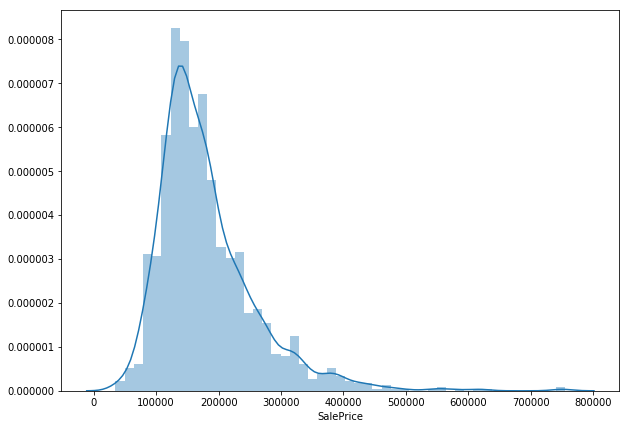

In [0]:
fig = plt.figure(figsize=(10,7))
ax=fig.gca()
sns.distplot(y_train['SalePrice'],ax=ax)

In [0]:
y_train['SalePrice']  = np.log(y_train['SalePrice'])
y_train.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [0]:
train_df.drop('Id',axis=1,inplace=True)
test_df.drop('Id',axis=1,inplace=True)
train_df.shape,test_df.shape


((1460, 80), (1459, 79))

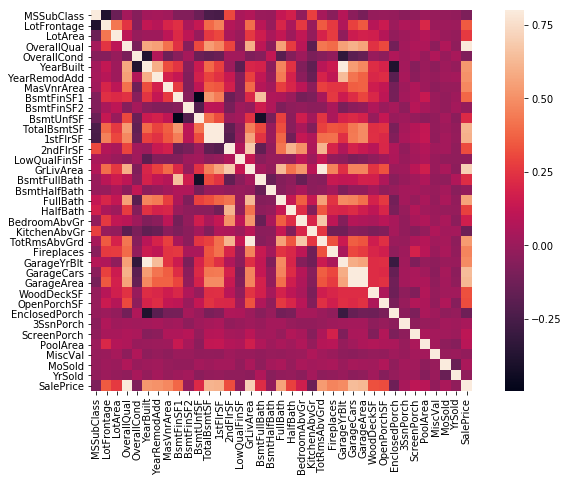

In [0]:
corr_mat = train_df.corr()
f,ax = plt.subplots(figsize=(12,7))
sns.heatmap(corr_mat,vmax=0.8,square=True)

In [0]:
k=10
top_10_features = corr_mat.nlargest(k,'SalePrice')['SalePrice'].index
top_10_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

(-0.5, 9.5, 0, 800000)

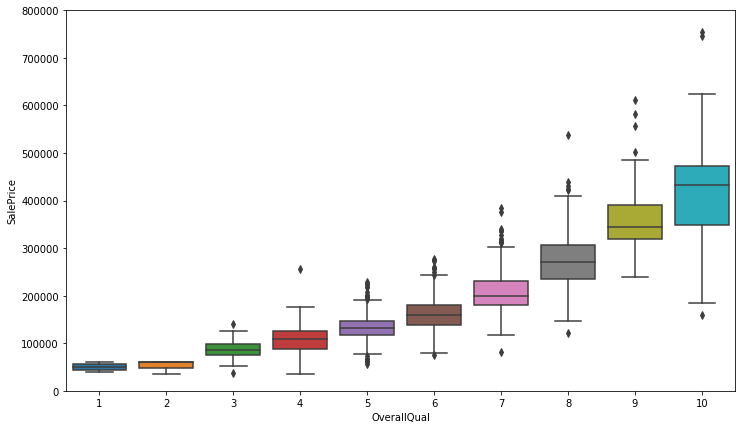

In [0]:
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'],train_df[var]],axis=1)
f,ax = plt.subplots(figsize=(12,7))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

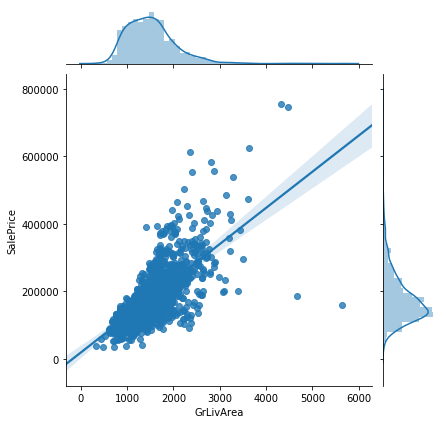

In [0]:
sns.jointplot(x=train_df['GrLivArea'],y=train_df['SalePrice'],kind='reg')

In [0]:
train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index,inplace=True)

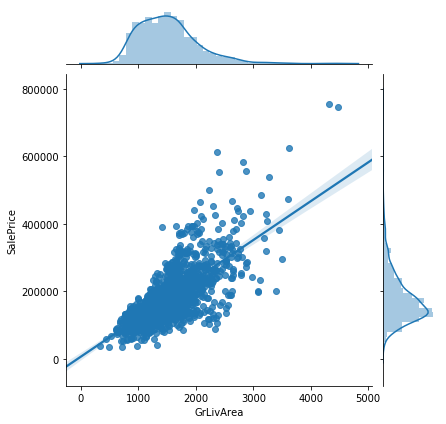

In [0]:
sns.jointplot(x=train_df['GrLivArea'],y=train_df['SalePrice'],kind='reg')

(-0.5, 4.5, 0, 800000)

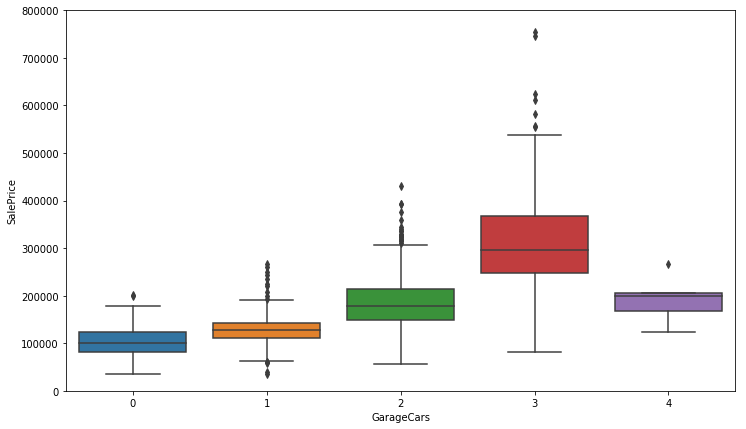

In [0]:
var = 'GarageCars'
data = pd.concat([train_df['SalePrice'],train_df[var]],axis=1)
f,ax = plt.subplots(figsize=(12,7))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

In [0]:
train_df.drop(train_df[(train_df['GarageCars']>3) & (train_df['SalePrice']<300000)].index,inplace=True)

(-0.5, 3.5, 0, 800000)

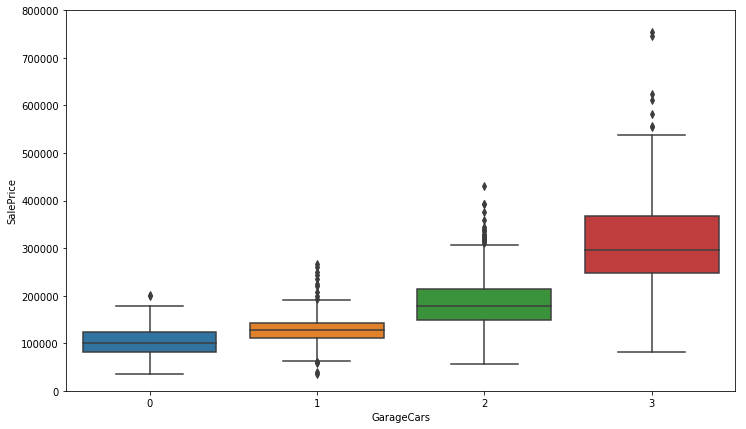

In [0]:
var = 'GarageCars'
data = pd.concat([train_df['SalePrice'],train_df[var]],axis=1)
f,ax = plt.subplots(figsize=(12,7))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

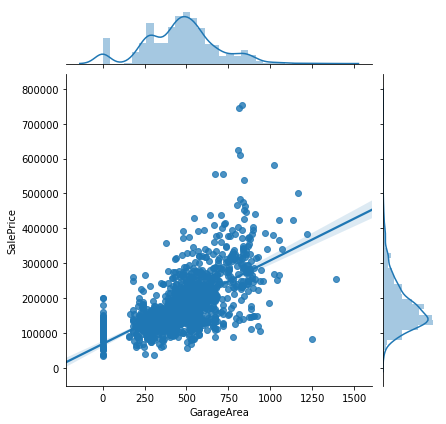

In [0]:
sns.jointplot(x=train_df['GarageArea'],y=train_df['SalePrice'],kind='reg')

In [0]:
train_df.drop(train_df[(train_df['GarageArea']>1000) & (train_df['SalePrice']<300000)].index,inplace=True)

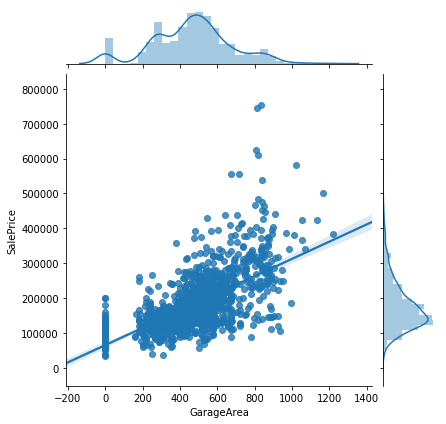

In [0]:
sns.jointplot(x=train_df['GarageArea'],y=train_df['SalePrice'],kind='reg')

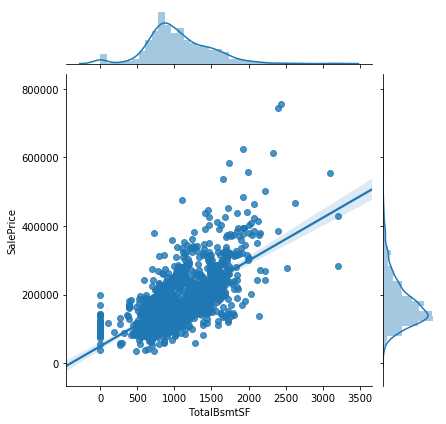

In [0]:
sns.jointplot(x=train_df['TotalBsmtSF'],y=train_df['SalePrice'],kind='reg')

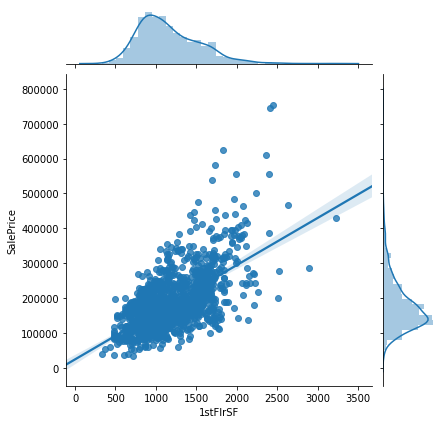

In [0]:
sns.jointplot(x=train_df['1stFlrSF'],y=train_df['SalePrice'],kind='reg')

(-0.5, 3.5, 0, 800000)

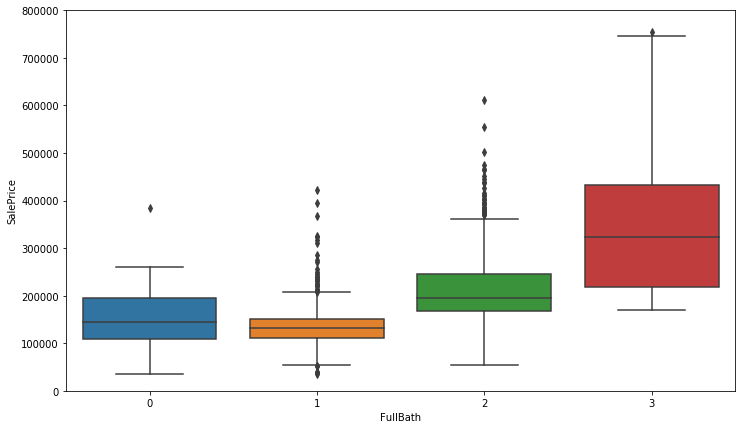

In [0]:
var = 'FullBath'
data = pd.concat([train_df['SalePrice'],train_df[var]],axis=1)
f,ax = plt.subplots(figsize=(12,7))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

(-0.5, 11.5, 0, 800000)

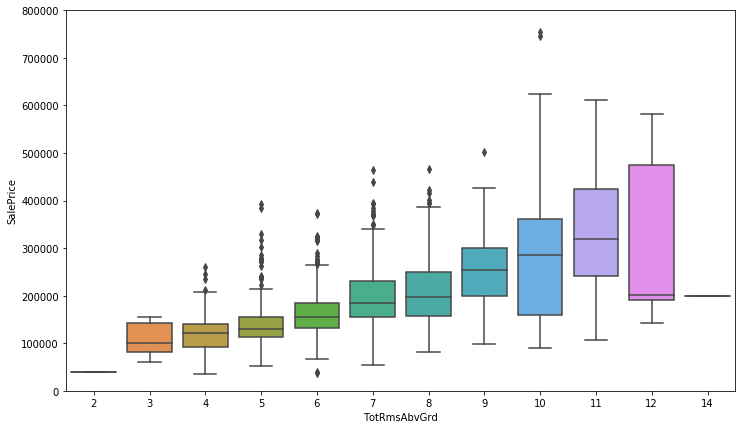

In [0]:
var = 'TotRmsAbvGrd'
data = pd.concat([train_df['SalePrice'],train_df[var]],axis=1)
f,ax = plt.subplots(figsize=(12,7))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

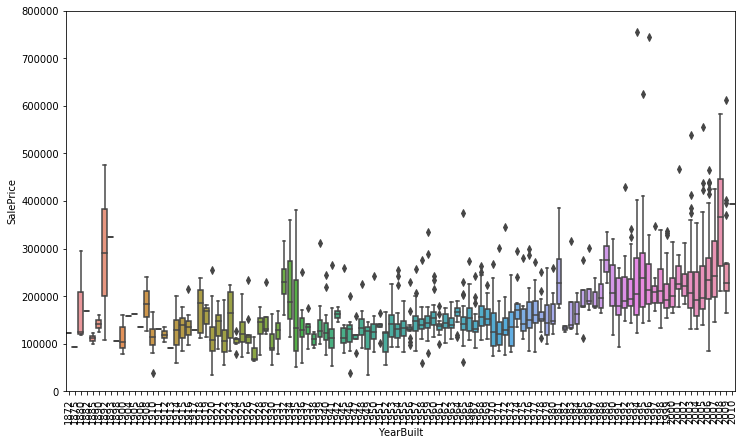

In [0]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'],train_df[var]],axis=1)
f,ax = plt.subplots(figsize=(12,7))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90);

In [0]:
train_df.shape

(1448, 80)

In [0]:
df_combined=pd.concat([train_df,test_df],axis=0)
df_combined.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2907, 80)

In [0]:
y_train = train_df['SalePrice']
y_train.shape

(1448,)

In [0]:
df_combined.drop('SalePrice',axis=1,inplace=True)
df_combined.shape

(2907, 79)

In [0]:

all_data_na = (df_combined.isnull().sum() / len(df_combined))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing_ratio' : all_data_na})
missing_data

,Missing_ratio
PoolQC,99.690402
MiscFeature,96.422429
Alley,93.223254
Fence,80.392157
FireplaceQu,48.710010
LotFrontage,16.683867
GarageQual,5.469556
GarageCond,5.469556
GarageFinish,5.469556
GarageYrBlt,5.469556


In [0]:
df_combined['PoolQC'] = df_combined['PoolQC'].fillna('None')
df_combined['MiscFeature'] = df_combined['MiscFeature'].fillna('None')
df_combined['Alley'] = df_combined['Alley'].fillna('None')
df_combined['Fence'] = df_combined['Fence'].fillna('None')
df_combined['FireplaceQu'] = df_combined['FireplaceQu'].fillna('None')
df_combined['LotFrontage'] = df_combined.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

for col in ('GarageQual','GarageCond','GarageType','GarageFinish'):
  df_combined[col]=df_combined[col].fillna('None')
  
for col in ('GarageYrBlt','GarageCars','GarageArea'):
  df_combined[col] = df_combined[col].fillna(0)
  
for col in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
  df_combined[col] = df_combined[col].fillna(0)
  
for col in ('BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual'):
  df_combined[col] = df_combined[col].fillna('None')
  
df_combined['MasVnrType'] = df_combined['MasVnrType'].fillna('None')
df_combined['MasVnrArea'] = df_combined['MasVnrArea'].fillna(0)
df_combined['MSZoning'] = df_combined['MSZoning'].fillna(df_combined['MSZoning'].mode()[0])
df_combined.drop(['Utilities'],axis=1,inplace=True)
df_combined["Functional"] = df_combined["Functional"].fillna("Typ")
df_combined['Electrical'] = df_combined['Electrical'].fillna(df_combined['Electrical'].mode()[0])
df_combined['KitchenQual'] = df_combined['KitchenQual'].fillna(df_combined['KitchenQual'].mode()[0])
df_combined['Exterior1st'] = df_combined['Exterior1st'].fillna(df_combined['Exterior1st'].mode()[0])
df_combined['Exterior2nd'] = df_combined['Exterior2nd'].fillna(df_combined['Exterior2nd'].mode()[0])
df_combined['SaleType'] = df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0])
df_combined['MSSubClass'] = df_combined['MSSubClass'].fillna(df_combined['MSSubClass'].mode()[0])

In [0]:
df_combined.columns[df_combined.isnull().sum()>0]

Index([], dtype='object')

In [0]:
df_combined.shape

(2907, 78)

In [0]:
df_combined['MSSubClass'] = df_combined["MSSubClass"].apply(str)
df_combined['OverallCond'] = df_combined["OverallCond"].apply(str)
df_combined['YrSold'] = df_combined["YrSold"].apply(str)
df_combined['MoSold'] = df_combined["MoSold"].apply(str)

In [0]:
df_combined.shape

(2907, 78)

In [0]:
from sklearn.preprocessing import LabelEncoder


In [0]:
label_encoding_cols = ['MSSubClass','OverallCond','YrSold','MoSold','FireplaceQu','BsmtQual','BsmtCond','GarageQual','GarageCond','ExterQual','ExterCond','HeatingQC','PoolQC','KitchenQual','BsmtFinType1',
                       'BsmtFinType2','Functional','Fence','BsmtExposure','GarageFinish','LandSlope','LotShape','PavedDrive','Street','Alley','CentralAir']
len(label_encoding_cols)

26

In [0]:
for col in label_encoding_cols:
  lbl_encoder = LabelEncoder()
  lbl_encoder.fit(list(df_combined[col].values))
  df_combined[col] = lbl_encoder.transform(list(df_combined[col].values))

In [0]:
df_combined['ToTalSF'] = df_combined['1stFlrSF'] + df_combined['2ndFlrSF'] + df_combined['TotalBsmtSF'] 

In [0]:
df_combined.shape

(2907, 79)

In [0]:
y_train=np.log(y_train)

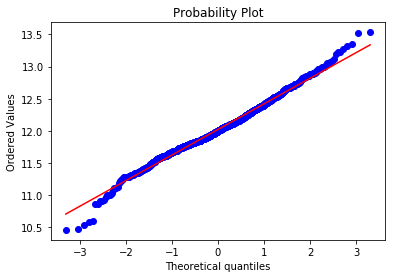

In [0]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

In [0]:
numerical_features = df_combined.dtypes[df_combined.dtypes != 'object'].index
len(numerical_features)

59

In [0]:
from scipy.stats import skew

skewed_features = df_combined[numerical_features].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' : skewed_features})
skewness

,Skew
MiscVal,21.911765
PoolArea,17.658029
LotArea,13.147728
LowQualFinSF,12.063406
3SsnPorch,11.352135
LandSlope,4.985948
KitchenAbvGr,4.328904
BsmtFinSF2,4.136294
EnclosedPorch,4.004313
ScreenPorch,3.937129


In [0]:

numerical_features = df_combined.dtypes[df_combined.dtypes != 'object'].index


skewed_features = df_combined[numerical_features].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' : skewed_features})
skewness.head()

,Skew
MiscVal,21.911765
PoolArea,17.658029
LotArea,13.147728
LowQualFinSF,12.063406
3SsnPorch,11.352135


In [0]:
skewness = skewness[abs(skewness)>0.75]



In [0]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15

In [0]:


for col in skewed_features:
  df_combined[col] = boxcox1p(df_combined[col],lam)
  df_combined[col] += 1

In [0]:
df_combined = pd.get_dummies(df_combined,drop_first=True)
df_combined.shape

(2907, 200)

In [0]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
ntrain,ntest

(1448, 1459)

In [0]:
train_data = df_combined[:ntrain]
test_data = df_combined[ntrain:]
train_data.shape,test_data.shape

((1448, 200), (1459, 200))

In [0]:
train_data.reindex();
test_data.reindex();

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
n_folds = 5
def rmse_cv(model):
  kf = KFold(n_folds,shuffle=True,random_state = 42).get_n_splits(train_data)#.values)
  rmse = np.sqrt(-cross_val_score(model,train_data,y_train,scoring='neg_mean_squared_error',cv=kf))
  return rmse

In [0]:
lasso = make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))
ENet = make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005,random_state=3,l1_ratio=0.9))
krr  = KernelRidge(alpha=0.6,kernel='polynomial',degree=2,coef0=2.5)
gbr = GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=4,max_features='sqrt',min_samples_leaf=15,min_samples_split=10,loss='huber',random_state=5)


In [0]:
xgbr = xgb.XGBRegressor(colsample_bytree=0.2,gamma=0.0,learning_rate=0.05,max_depth=6,min_child_weight=1.5,n_estimators=7200,reg_alpha=0.9,reg_lambda=0.6,subsample=0.2,seed=42,silent=1,random_state=7)


In [0]:
lgbr = lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05,n_eatimators=720,max_bin=55,bagging_fraction=0.8,bagging_freq=5,feature_fraction=0.2319,features_fraction_seed=9,bagging_seed=9,\
                         min_data_in_leaf=6,min_sum_hessian_in_leaf=1)

In [0]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(ENet)
print("\nElasticnet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(krr)
print("\nKernal Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(gbr)
print("\nGredient Boost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(xgbr)
print("\nXGB Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(lgbr)
print("\nLGBM regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1134 (0.0063)


Elasticnet score: 0.1134 (0.0064)


Kernal Ridge: 0.1162 (0.0071)


Gredient Boost score: 0.1151 (0.0062)



/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



XGB Regressor score: 0.1196 (0.0062)


LGBM regressor score: 0.1314 (0.0064)



In [0]:
class Averaging_models(BaseEstimator,RegressorMixin, TransformerMixin):
  
  def __init__(self,models):
    self.models = models
    
  def fit(self,X,y):
    self.models_ = [clone(x) for x in self.models]
    
    for model in self.models_:
      model.fit(X,y)
    
    return self
  
  def predict(self,X):
    predictions = np.column_stack([model.predict(X) for model in self.models_])
    return np.mean(predictions,axis=1)
    

In [0]:
averaged_models = Averaging_models(models=(ENet,gbr,krr,lasso))

In [0]:
averaged_models;

In [0]:
score = rmse_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Averaged base models score: 0.1097 (0.0064)



In [0]:
class Stacking_Average_model(BaseEstimator,RegressorMixin,TransformerMixin):
  def __init__(self,base_models,meta_model,n_folds=5):
    self.base_models = base_models
    self.meta_model = meta_model
    self.n_folds=n_folds
    
  def fit(self,X,y):
    self.base_models_ = [list() for x in self.base_models]
    self.meta_model = clone(self.meta_model)
    kfold = KFold(n_splits=self.n_folds,shuffle=True)
    
    out_of_fold_predictions = np.zeros((X.shape[0],len(self.base_models)))
    for i,clf in enumerate(self.base_models):
      for train_index,holdout_index in kfold.split(X,y):
        instance = clone(clf)
        self.base_models_[i].append(instance)
        instance.fit(X[train_index],y[train_index])
        y_pred = instance.predict(X[holdout_index])
        out_of_fold_predictions[holdout_index,i] = y_pred
    self.meta_model_.predict(out_of_fold_predictions,y)
    return self
  
  def predict(self,X):
    meta_features = np.columns_stack([np.columns_stack([model.predict(X) for model in base_models]).mean(axis=1) for base_models in self.base_models_])
    return self.meta_model_.predict(meta_features)
      
    
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(clf)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


In [0]:
np.any(np.isnan(train_data))

False

In [0]:
np.all(np.isfinite(train_data))

True

In [0]:
train_data.shape

(1448, 200)

In [0]:
#train_data = train_data.reset_index()
train_data = train_data.as_matrix().astype(np.float)
y_train = y_train.as_matrix().astype(np.float)
test_data = test_data.as_matrix().astype(np.float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#test_data = test_data.as_matrix().astype(np.float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
test_data.shape,train_data.shape

((1459, 200), (1448, 200))

In [0]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, gbr, krr),
                                                 meta_model = lasso)

score = rmse_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1095 (0.0064)


In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
stacked_averaged_models.fit(train_data, y_train)
stacked_train_pred = stacked_averaged_models.predict(train_data)
stacked_pred = np.expm1(stacked_averaged_models.predict(test_data))
print(rmsle(y_train, stacked_train_pred))

0.07575643502117888


In [0]:
train_data.shape
test_data.shape

(1459, 200)

In [0]:
xgbr.fit(train_data, y_train)
xgb_train_pred = xgbr.predict(train_data)
xgb_pred = np.expm1(xgbr.predict(test_data))
print(rmsle(y_train, xgb_train_pred))

0.042374642137542266


In [0]:
lgbr.fit(train_data, y_train)
lgb_train_pred = lgbr.predict(train_data)
lgb_pred = np.expm1(lgbr.predict(test_data))
print(rmsle(y_train, lgb_train_pred))

0.11540053687768013


In [0]:
Stacked = 1/(0.1077)
XGBoost = 1/(0.1177)
LGBM = 1/(0.1159)
Sum = Stacked + XGBoost + LGBM
Stacked = Stacked/Sum
XGBoost = XGBoost/Sum
LGBM = LGBM/Sum
print(Stacked, XGBoost, LGBM)

0.35158188821434966 0.32171086967447293 0.3267072421111774


In [0]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.10 + lgb_train_pred*0.20 ))

RMSLE score on train data:
0.07653017665481145


In [0]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*Stacked +
               xgb_train_pred*XGBoost + lgb_train_pred*LGBM))ensemble = stacked_pred*Stacked + xgb_pred*XGBoost + lgb_pred*LGBM

RMSLE score on train data:
0.07267013999031267


In [0]:
ensemble = stacked_pred*Stacked + xgb_pred*XGBoost + lgb_pred*LGBM

In [0]:
sub = pd.DataFrame()
submission_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/House price data/sample_submission.csv')
sub['Id'] = submission_data['Id']
sub['SalePrice'] = ensemble
sub.to_csv('submission1.csv',index=False)

In [0]:
from google.colab import files
files.download("submission1.csv")